# Similarity analysis
This notebook aims to give us a better understanding of the similarities we can expected from the dataset we have been using so far.

The analysis was produced using the [pg_trgm](https://www.postgresql.org/docs/9.6/pgtrgm.html) and [pg_similarity](https://github.com/eulerto/pg_similarity#functions-and-operators) package, which provides a comprehenstive set of string similarity functions for Postgresql.

After installing the package as described in the repositories instructions, one needs to load the extension in the appropriate databases (as administrator):
```
# psql dbname -U postgres 
CREATE EXTENSION pg_similiarity;
CREATE EXTENSION pg_trgm;
```

Then we create a large table from the (near) cartesian product of the `nodes` tables. The product actually excludes nodes with *empty label*. We also exclude entity pairs that to not match on the entity type.

```
CREATE TABLE similarities AS 
	SELECT n1.item id1, n1.type type1, n1.label label1, n2.item id2, n2.type type2, n2.label label2, 
           block(n1.label, n1.label), cosine(n1.label, n2.label), dice(n1.label, n2.label), 
           euclidean(n1.label, n2.label), jaccard(n1.label, n2.label), jaro(n1.label, n2.label), 
           jarowinkler(n1.label, n2.label), lev(n1.label, n2.label), matchingcoefficient(n1.label, n2.label), 
           mongeelkan(n1.label, n2.label), needlemanwunsch(n1.label, n2.label), 
           overlapcoefficient(n1.label, n2.label), qgram(n1.label, n2.label), 
           smithwaterman(n1.label, n2.label), smithwatermangotoh(n1.label, n2.label), soundex(n1.label, n2.label), 
           word_similarity(n1.label, n2.label) as trgm_word_similarity, 
           similarity(n1.label, n2.label) as trgm_similarity
	FROM nodes n1, nodes n2 
	WHERE '' not in (n1.label, n2.label) 
	AND (not (n1.type like 'ENTITY%' OR n2.type like 'ENTITY%') OR n1.type = n2.type);

```

All but the last 2 function calls rely on pg_similarity functions, the last ones rely on the pg_trgm package.

The final steps consists in count the number of item greater or equals to various thresholds.

Note that the **Manhattan, Mone-elkan, Needleman-wunsch** are not plotted, as there seems to be some issues wrt normalization.
**Soundex** was excluded as it only works for ASCII characters.
**Jaro-Winkler** and **Smith-Waterman-Gotoh** are also ingnored for readbility.

In [1]:
import pandas as pd
import numpy as np
import collections as coll
import matplotlib.pyplot as plt


## Generated data (scale factor = 100)
\# nodes = 647

\# candidate pairs = 124K

| id |    type    |                                         path                                          |
|:--:|:-----------|:--------------------------------------------------------------------------------------|
|  1 | TEXT       | file:/Users/jleblay/Workspace/cedar.kwd_search_het_code/data/generated-100-query.txt  |
|  2 | RDF        | file:/Users/jleblay/Workspace/cedar.kwd_search_het_code/data/generated-100-query.nt   |
|  3 | JSON       | file:/Users/jleblay/Workspace/cedar.kwd_search_het_code/data/generated-100-query.json |
|  4 | RELATIONAL | jdbc:postgresql://localhost:5432/csv?currentSchema=generated_100_query&user=postgres  |


In [10]:
data = pd.read_csv('../sim-analysis-gen-100.csv', encoding='UTF-8')
data

threshold   block  cosine    dice  euclidean  jaccard    jaro  \
0         0.0  124285  124285  124285     124285   124285  124285   
1         0.1  124285    4903    4903     119761     4895  121079   
2         0.2  124285    4895    4895     119761     4729  121079   
3         0.3  124285    4773    4729      69929     4483  119485   
4         0.4  124285    4653    4653      40975     2501  106105   
5         0.5  124285    4201    4385      31203     1093   52527   
6         0.6  124285    1317    2413       4693      715   11725   
7         0.7  124285     801     733       4173      691    4697   
8         0.8  124285     691     701        701      687    3155   
9         0.9  124285     687     687        687      687     709   
10        1.0  124285     154     687        687      687     682   

    jarowinkler     lev  matchingcoefficient  mongeelkan  needlemanwunsch  \
0        124285  124285               124285      124285           124285   
1        121079   90515                 4903      123995           124284   
2        121079   26339                 4813      123995           124284   
3        119485    8445                 4713      123995           124282   
4        106105    4943                 4477      123995           124282   
5         52527    4287                 4051      123995           124273   
6         11725    3153                 2197      123995           124256   
7          4697     957                  715      123995           124227   
8          4391     709                  701      123995           124071   
9          1703     687                  687      123995           123301   
10          682     687                  687          17             1183   

    overlapcoefficient   qgram  smithwaterman  smithwatermangotoh  soundex  \
0               124285  124285         124285              124285   124285   
1                 4903   10381         111453              123995     4287   
2                 4897    5439          46587              123639     4287   
3                 4889    4715          17345              115015     4287   
4                 4729    4427           8877               87469     4287   
5                 4723    3977           6417               64951     4287   
6                 3947    1289           3649               40717     4287   
7                 1355     735           1585               26815     4287   
8                  897     693            987               20941     4287   
9                  869     687            805               14237     4287   
10                 869     687            761                2564     4287   

    trgm_word_similarity  trgm_similarity  
0                 124285           124285  
1                  15186             6527  
2                   6418             4777  
3                   5075             4331  
4                   4603             2201  
5                   4007              863  
6                   1640              713  
7                   1049              687  
8                    786              687  
9                    778              687  
10                   778              687

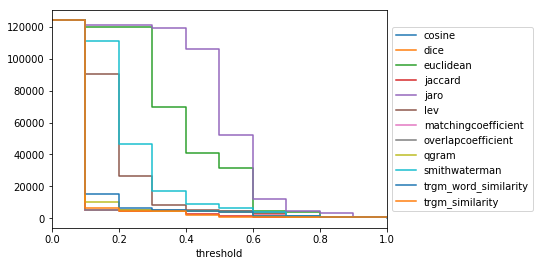

In [11]:
plt = data[['threshold', 'cosine','dice','euclidean','jaccard','jaro','lev','matchingcoefficient','overlapcoefficient','qgram','smithwaterman','trgm_word_similarity','trgm_similarity']]\
    .plot(drawstyle='steps-post', x='threshold')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt

## Generated data (scale factor = 1000)
\# nodes = 4501

\# candidate pairs = 4.8M

| id |    type    |                                          path                                          |
|:---|:-----------|:---------------------------------------------------------------------------------------|
|  1 | RDF        | file:/Users/jleblay/Workspace/cedar.kwd_search_het_code/data/generated-1000-query.nt   |
|  2 | TEXT       | file:/Users/jleblay/Workspace/cedar.kwd_search_het_code/data/generated-1000-query.txt  |
|  3 | RELATIONAL | jdbc:postgresql://localhost:5432/csv?currentSchema=generated_1000_query&user=postgres  |
|  4 | JSON       | file:/Users/jleblay/Workspace/cedar.kwd_search_het_code/data/generated-1000-query.json |


In [12]:
data = pd.read_csv('../sim-analysis-gen-1000.csv', encoding='UTF-8')
data


threshold    block   cosine     dice  euclidean  jaccard     jaro  \
0         0.0  4876909  4876909  4876909    4876909  4876909  4876909   
1         0.1  4876909   218819   218819    4752225   218795  4772297   
2         0.2  4876909   218705   218721    4752225   210737  4772297   
3         0.3  4876909   214313   210737    2630009   202237  4719815   
4         0.4  4876909   207739   207755    1610749   121775  4273477   
5         0.5  4876909   191453   199687    1206567    29471  2259983   
6         0.6  4876909    36447   120693     211181     8287   555993   
7         0.7  4876909     9737     8749     191249     6291   219433   
8         0.8  4876909     6333     7203       7165     6173   153517   
9         0.9  4876909     6171     6171       6169     6169     7567   
10        1.0  4876909     1559     6169       6169     6169     6144   

    jarowinkler      lev  matchingcoefficient  mongeelkan  needlemanwunsch  \
0       4876909  4876909              4876909     4876909          4876891   
1       4772297  3750189               218819     4866883          4876871   
2       4772297  1220839               216424     4866883          4876856   
3       4719815   407737               209715     4866883          4876811   
4       4273477   232287               201368     4866883          4876764   
5       2259983   203307               190958     4866875          4876547   
6        555993   155747               113687     4866875          4875845   
7        219433    22553                 8243     4866864          4873193   
8        201241     7411                 7149     4866755          4863414   
9         75855     6203                 6169     4866751          4820721   
10         6144     6167                 6169         659            54369   

    overlapcoefficient    qgram  smithwaterman  smithwatermangotoh  soundex  \
0              4876909  4876909        4876909             4876909  4876909   
1               218819   477389        4413539             4866911   197411   
2               218807   249677        1782331             4855531   197411   
3               218245   212587         650387             4558807   197411   
4               213191   202615         359325             3491981   197411   
5               213035   187965         279841             2529659   197411   
6               184317    38387         160837             1551245   197411   
7                36919     8261          55779             1029449   197411   
8                10279     6361          26267              795895   197411   
9                 8845     6163          19207              556931   197411   
10                8845     6161          18487               88794   197411   

    trgm_word_similarity  trgm_similarity  
0                4876909          4876909  
1                 631320           300359  
2                 291022           215601  
3                 228948           200127  
4                 212178            84915  
5                 187353            13795  
6                  47258             7525  
7                  17576             6317  
8                   7845             6197  
9                   7487             6175  
10                  7479             6175

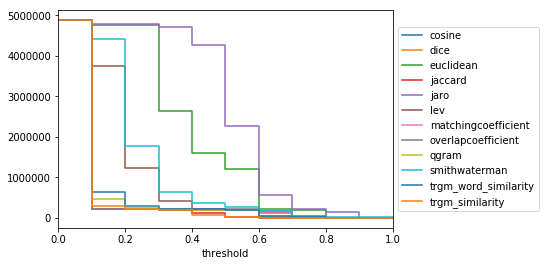

In [13]:
plt = data[['threshold', 'cosine','dice','euclidean','jaccard','jaro','lev','matchingcoefficient','overlapcoefficient','qgram','smithwaterman','trgm_word_similarity','trgm_similarity']]\
    .plot(drawstyle='steps-post', x='threshold')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt

## Deputes+Politicians
\# nodes = 8163

\# candidate pairs = 54M

| id |    type    |                                          path                                                                      |
|:---|:-----------|:-------------------------------------------------------------------------------------------------------------------|
|  1 | RDF        | file:/Users/jleblay/Workspace/cedar.kwd_search_het_code/data/rdf/rdf_05/model-03_17-12800-hollande-macron-royal.nt | 


In [14]:
data = pd.read_csv('../sim-analysis-deputes-politicians.csv', encoding='UTF-8')
data


threshold     block    cosine      dice  euclidean   jaccard      jaro  \
0         0.0  54159337  54159337  54159337   54159337  54159337  54159337   
1         0.1  54159337  11351241  11350917   50278293  10928945  47437543   
2         0.2  54159337  10868491  10865689   50278293   7566103  47437543   
3         0.3  54159337   8839449   8832913   45208991   6414137  46664907   
4         0.4  54159337   6439137   6442065   40701031   6271477  39914227   
5         0.5  54159337   6386791   6398743   39028983   6005213  20994895   
6         0.6  54159337   6166743   6163241   18127413   3226495  11854553   
7         0.7  54159337   5376935   5375041    7090795   1800483   6648857   
8         0.8  54159337   1802325   2288725    3335881      8927   6297091   
9         0.9  54159337      8737      8767       8723      8697   1255405   
10        1.0  54159337      3099      8695       8695      8695      8560   

    jarowinkler       lev  matchingcoefficient  mongeelkan  needlemanwunsch  \
0      54159337  54159337             54159337    54159337         54159316   
1      47437543  33724443             11330710    49325143         54159258   
2      47437543  14345685             10649696    49325143         54159176   
3      46664907   7443303              7103137    49325138         54158983   
4      39914227   6728573              6420264    49323694         54158310   
5      20994895   6579991              6340275    49319336         54156599   
6      11854553   6340335              5568040    49275616         54149029   
7       6648857   4433853              3426696    49227499         54127032   
8       6550285   1049105              2284276    49187469         54053112   
9       5640865    170261                 8746    49103900         53483763   
10         8560      8871                 8708      245303           840734   

    overlapcoefficient     qgram  smithwaterman  smithwatermangotoh  \
0             54159337  54159337       54159337            54159337   
1             11352663  12744857       46668207            49577489   
2             11065173   6869149       23613171            49203305   
3             10347509   6527259       12689421            44420787   
4              7758311   6457965        8909865            37251021   
5              6468725   6393117        7615195            29601741   
6              6326303   6126681        6735855            22269439   
7              6176861   4056395        6187741            17420081   
8              5699371    325197        2670705            14752279   
9                18117     32477         256019            11922707   
10               18063      8671          43661             1212826   

    trgm_word_similarity  trgm_similarity  
0               54159337         54159337  
1               15927253         11317629  
2                8570666          6615925  
3                6813956          6469625  
4                6582262          6334975  
5                6428396          5819765  
6                5977665          1579775  
7                3912669           261847  
8                1236514           110273  
9                  42400             9161  
10                 14712             8899

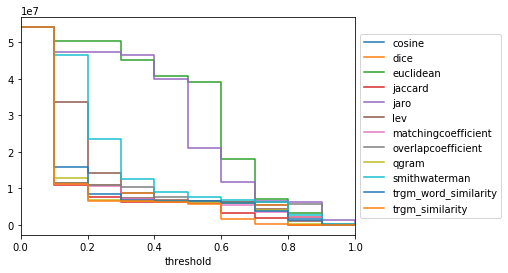

In [15]:
plt = data[['threshold', 'cosine','dice','euclidean','jaccard','jaro','lev','matchingcoefficient','overlapcoefficient','qgram','smithwaterman','trgm_word_similarity','trgm_similarity']]\
    .plot(drawstyle='steps-post', x='threshold')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt